# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`
Для того, чтобы можно было повторно вопсроизводить полученные результаты

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [26]:
df_train.sample(30) #случайные 30 строк

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [27]:
display(df_train.head()) #первые 5 строк
display(df_train.tail()) #последние 5 строк

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

name  year  selling_price  km_driven    fuel  \
6994       Hyundai i20 Magna  2013         320000     110000  Petrol   
6995   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997         Tata Indigo CR4  2013         290000      25000  Diesel   
6998         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power                     torque  seats  
6994  82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995    110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996   73.9 bhp             190Nm@ 2000rpm    5.0  
6997     70 bhp        140Nm@ 1800-3000rpm    5.0  
6998     70 bhp        140Nm@ 1800-3000rpm    5.0

In [28]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [29]:
#вывод признаков с пропусками
for col in df_train.columns:
    if df_train[col].isna().sum():
        print(col)


mileage
engine
max_power
torque
seats


In [30]:
#подсчет количества дубликатов
df_train.shape[0] - df_train.drop_duplicates().shape[0]

985

### Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Можно увидеть формат данных в признаках, их примерный масштаб, количество объектов и признаков. Нельзя сделать выводы о дубликатах, распределении данных, выбросах, пропусках, ошибках в данных

###Достаточно ли метода duplicated для анализа дубликатов? Почему?

Метод может не показать все дубликаты. Это может быть связано с ошибками в заполнении датасета, например, есть признак ID клиента, который ошибочно был введен неверно, но остальные признаки будут повторять уже имеющиеся для этого ID. Или при одинаковом наборе признаков будут отличаться значения целевой переменной. Или при одинковых значениях признаков не совпадет их формат, например, в одном месте число будет введено как строка.

In [31]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.4 MB/s eta 0:00:00


In [32]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [33]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 16.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
4     Individual       Manual           First Owner  20.14 kmpl  1197 CC   
...          ...          ...                   ...         ...      ...   
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4      81.86 bhp          113.75nm@ 4000rpm    5.0  
...          ...                        ...    ...  
6994   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996    73.9 bhp             190Nm@ 2000rpm    5.0  
6997      70 bhp        140Nm@ 1800-3000rpm    5.0  
6998      70 bhp        140Nm@ 1800-3000rpm    5.0  

[6999 rows x 13 columns]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [5]:
# your code here
def strip_mileage(s):
    try:
        s = s.strip(' kmpl').strip(' km/kg')
    except:
        s = float(s)
    return float(s)

df_train['mileage'] = df_train['mileage'].apply(lambda x: strip_mileage(x))
df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\1601513646.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)


In [6]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: strip_mileage(x))
df_test['mileage'].fillna(df_train['mileage'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\255429727.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['mileage'].fillna(df_train['mileage'].median(), inplace=True)


In [7]:
def strip_engine(s):
    try:
        s = s.strip(' CC')
    except:
        s = float(s)
    return float(s)

df_train['engine'] = df_train['engine'].apply(lambda x: strip_engine(x))
df_train['engine'].fillna(df_train['engine'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\1856204585.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['engine'].fillna(df_train['engine'].median(), inplace=True)


In [8]:
df_test['engine'] = df_test['engine'].apply(lambda x: strip_engine(x))
df_test['engine'].fillna(df_train['engine'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\2141113087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['engine'].fillna(df_train['engine'].median(), inplace=True)


In [9]:
def strip_power(s):
    try:
        s = s.strip(' bhp')
        return float(s)
    except:
        if s == '':
            return np.nan
        else:
            return float(s)

df_train['max_power'] = df_train['max_power'].apply(lambda x: strip_power(x))
df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\3049824811.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)


In [10]:
df_test['max_power'] = df_test['max_power'].apply(lambda x: strip_power(x))
df_test['max_power'].fillna(df_train['max_power'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\3267275278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['max_power'].fillna(df_train['max_power'].median(), inplace=True)


In [11]:
def strip_torque(s):
    if type(s)==float:
        if s<50:
            s*=10
        return s

    if 'nm' in s.lower():
        try:
            s = float(s.lower().split('nm')[0])
        except:
            s = float(s.lower().split('@')[0])
    elif 'kgm' in s.lower():
        try:
            s = float(s.lower().split('kgm')[0])
            s*=9.8
        except:
            s = float(s.lower().split('@')[0])
            s*=9.8
    else:
        return np.nan
    return s

df_train['torque'] = df_train['torque'].apply(lambda x: strip_torque(x))
df_train['torque'].fillna(df_train['torque'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\2571572495.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['torque'].fillna(df_train['torque'].median(), inplace=True)


In [12]:
df_test['torque'] = df_test['torque'].apply(lambda x: strip_torque(x))
df_test['torque'].fillna(df_train['torque'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\3327934523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['torque'].fillna(df_train['torque'].median(), inplace=True)


In [13]:
df_train['seats'].fillna(df_train['seats'].median(), inplace=True)
df_test['seats'].fillna(df_train['seats'].median(), inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\2157000081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['seats'].fillna(df_train['seats'].median(), inplace=True)
C:\Users\dmitr\AppData\Local\Temp\ipykernel_23948\2157000081.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [44]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [45]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [14]:
# дубликаты в признаках трейна
df_train.drop('selling_price', axis=1).duplicated().sum()

np.int64(1159)

In [47]:
# вывод дубликатов
display(df_train[df_train.drop('selling_price', axis=1).duplicated()])

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  torque  seats  
254   1197.0      82.00   114.0    5.0  
258   1197.0      85.80   114.0    5.0  
268   1197.0      85.80   114.0    5.0  
324   1999.0     177.00   430.0    5.0  
325   2487.0     214.56   202.0    5.0  
...      ...        ...     ...    ...  
6947   995.0      62.00    90.3    5.0  
6984  1498.0      98.63   215.0    5.0  
6989  1248.0      74.00   190.0    5.0  
6997  1396.0      70.00   140.0    5.0  
6998  1396.0      70.00   140.0    5.0  

[1159 rows x 13 columns]

In [15]:
# удаление дубликатов
df_train.drop_duplicates(subset= df_train.columns.drop('selling_price'), inplace=True, keep='first')

In [16]:
# обновление индексов
df_train.reset_index(inplace=True)
df_train.drop('index', axis=1, inplace=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  torque  seats  
0         74.00  190.00    5.0  
1        103.52  250.00    5.0  
2         90.00  219.52    5.0  
3         88.20  112.70    5.0  
4         81.86  113.75    5.0  
...         ...     ...    ...  
5835      62.10   96.10    5.0  
5836      67.10   90.00    5.0  
5837      82.85  113.70    5.0  
5838     110.00  235.20    5.0  
5839      73.90  190.00    5.0  

[5840 rows x 13 columns]

In [50]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

## Первые два пункта были выполнены в задании 1 во время обработки пропусков, включая столбец `torque`, даже жаль теперь его удалять ))

<Axes: >

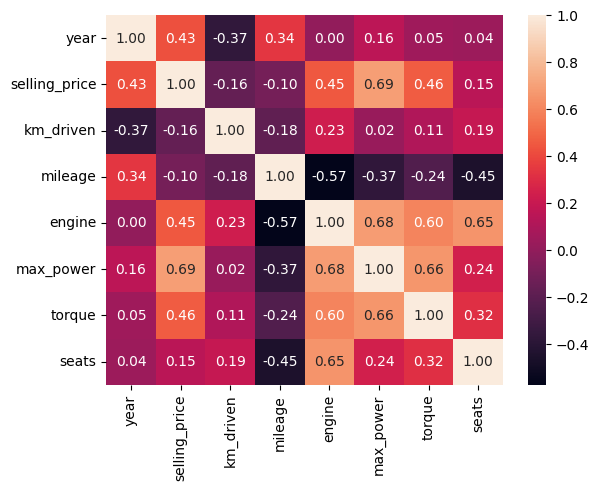

In [51]:
# your code here
display(sns.heatmap(df_train.drop(['name',	'fuel',	'seller_type',	'transmission',	'owner'], axis=1).corr(), annot=True, fmt='.2f'))

<Axes: >

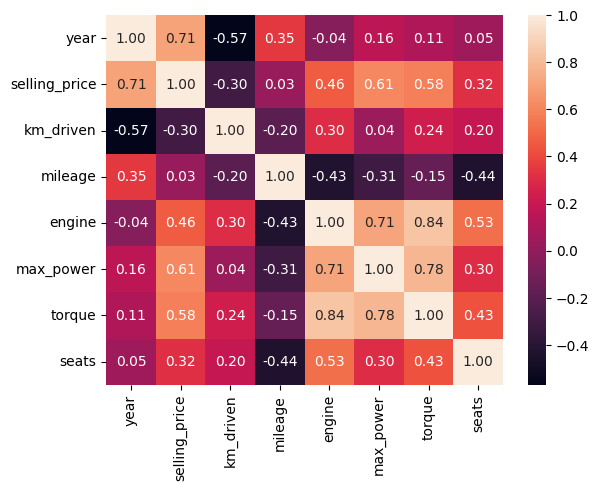

In [52]:
# your code here
display(sns.heatmap(df_train.drop(['name',	'fuel',	'seller_type',	'transmission',	'owner'], axis=1).corr(method='spearman'), annot=True, fmt='.2f'))

### Замечание
Признак `torque` достаточно сильно скоррелирован с признаком объема двигателя и мощности, что вполне логично, поэтому его удаление может пойти на пользу

In [17]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [18]:
# your code here
df_train['seats'] = df_train['seats'].astype(int)
df_train['engine'] = df_train['engine'].astype(int)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

In [19]:
df_test['seats'] = df_test['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [56]:
# your code here
df_train.describe(include=object)

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [57]:
df_test.describe(include=object)

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [58]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [59]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

## Выводы по чиловым признакам
Среди 5840 объектов 1924 отличающихся названия авто в трейне, и 621 из 1000 в тетсте. Авто-бестселлеры в сетах разные По виду топлива больше всего дизельных авто - более половины от всех объектов в обоих сетах. Признак топлива содержит всего 4 разных значения и является категориальным, подойдет для кодирования методом OHE. Аналогично и тип продавца - три значения, и около 90% из них - Частный продавец. По типу КПП - 2 варианта, снова около 90% - ручная. Собственники - можно перевести в категорию - 5 вариантов, больше половины - 1 собственник. По итогу всех строковых признаков: имя оставить текстовым, остальные перевести в категории.

## Выводы
Год выпуска - с 1983 по 2020. Большая часть всё же выпущена уже в 2000-х, выбросов нет, и среднее близко к медиане. В цене большой разброс значений, от 30000 до 10000000. Среднее снова близко к медиане, но стандартное отклонение очень большое. Большая часть значений все же ближе к левой границе. Для рынка авто картина не удивительная, категории авто разнве и цены могут кратно отличаться друг от друга. Пробег также имеет очень большой разброс, картина аналогична цене. В трейне в признаках расхода топлива, объема двигателя и мощности есть нулевые значения, что явно является ошибками. В тесте только в расходе. В остальном они, вместе с количеством мест, несут в себе технические характеристики авто и выглядят адекватно. До 3-го квартиля по тех. характеристикам трейн и тест очень похожи, в макс. значениях в трейне больше разброс по всем категориям, кроме года выпуска.
Для построения модели в таком виде числовые признаки оставлять нельзя - очень отличается масштаб признаков

In [60]:
assert df_train.shape == (5840, 13)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

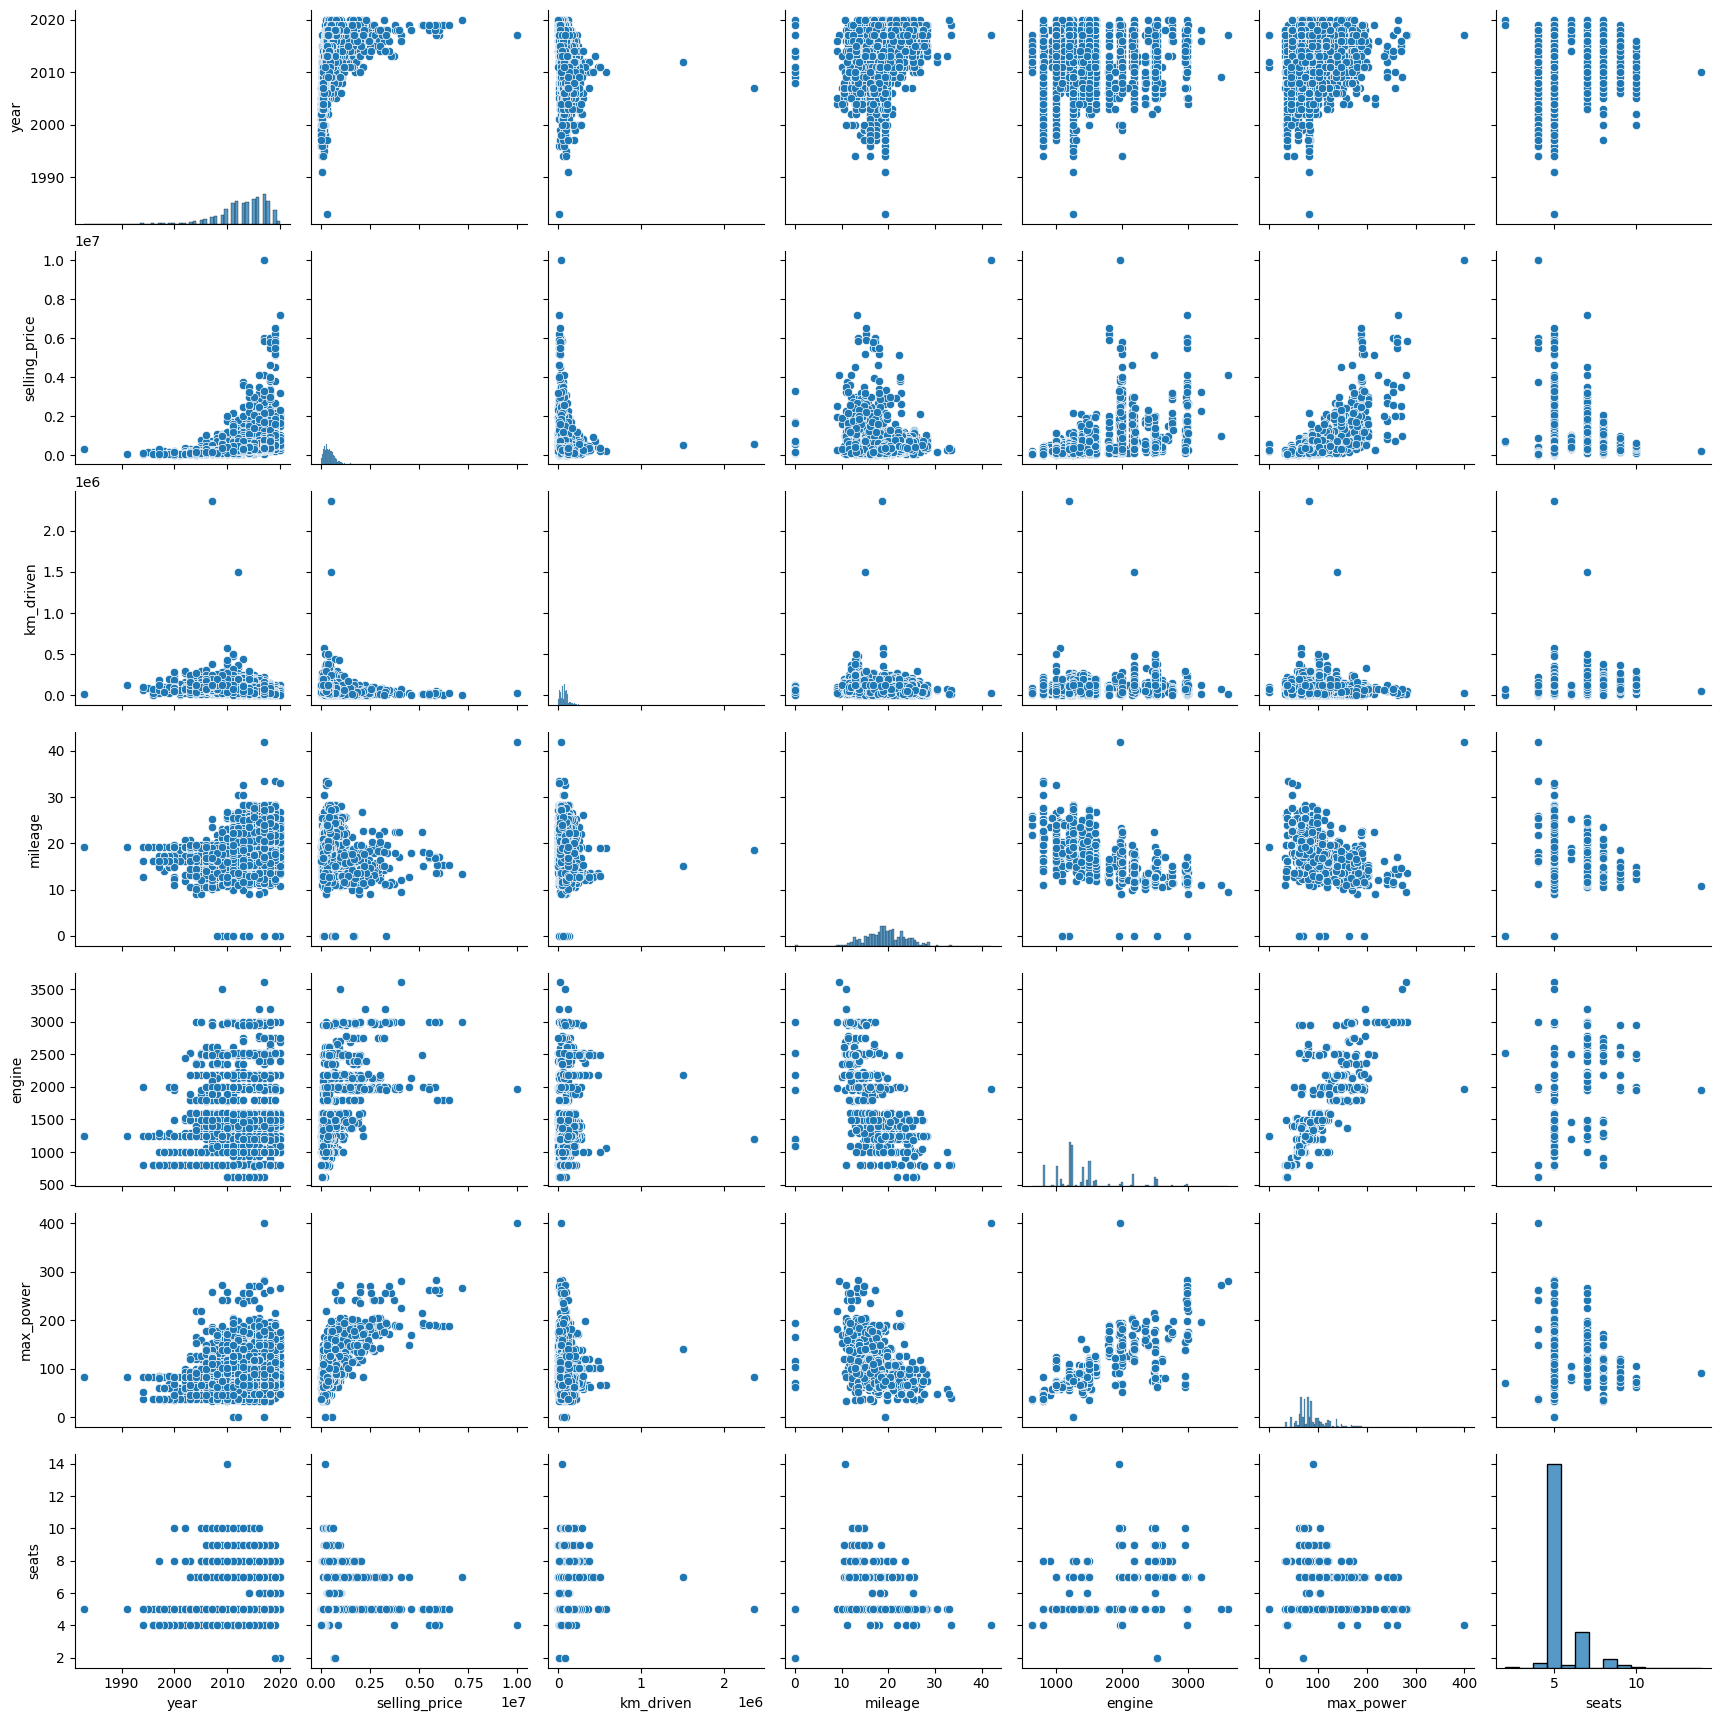

In [61]:
# your code here
sns.pairplot(df_train)

### Связь с целевой переменной
На графиках наблюдается связь сцелевой переменной признаков года выпуска авто и пробега. В первом случае прямая зависимость, во втором - обратная. Но в обоих случаях она скорее квадратичная, чем линейная. Связь признака мощности двигателя также похожа на связь признака года выпуска с целевой переменной.

### Корреляции междупризнаками
Можно предположить отрицательную корреляцию между объемом двигателя и пробегом авто на единицу расхода топлива. Объем двигателя положительно коррелирует с мощностью. Еще можно предположить, что чем больше кол-во мест в авто, тем меньше среди них дорогих, меньше пробег на единицу топлива и меньше очень мощных двигателей

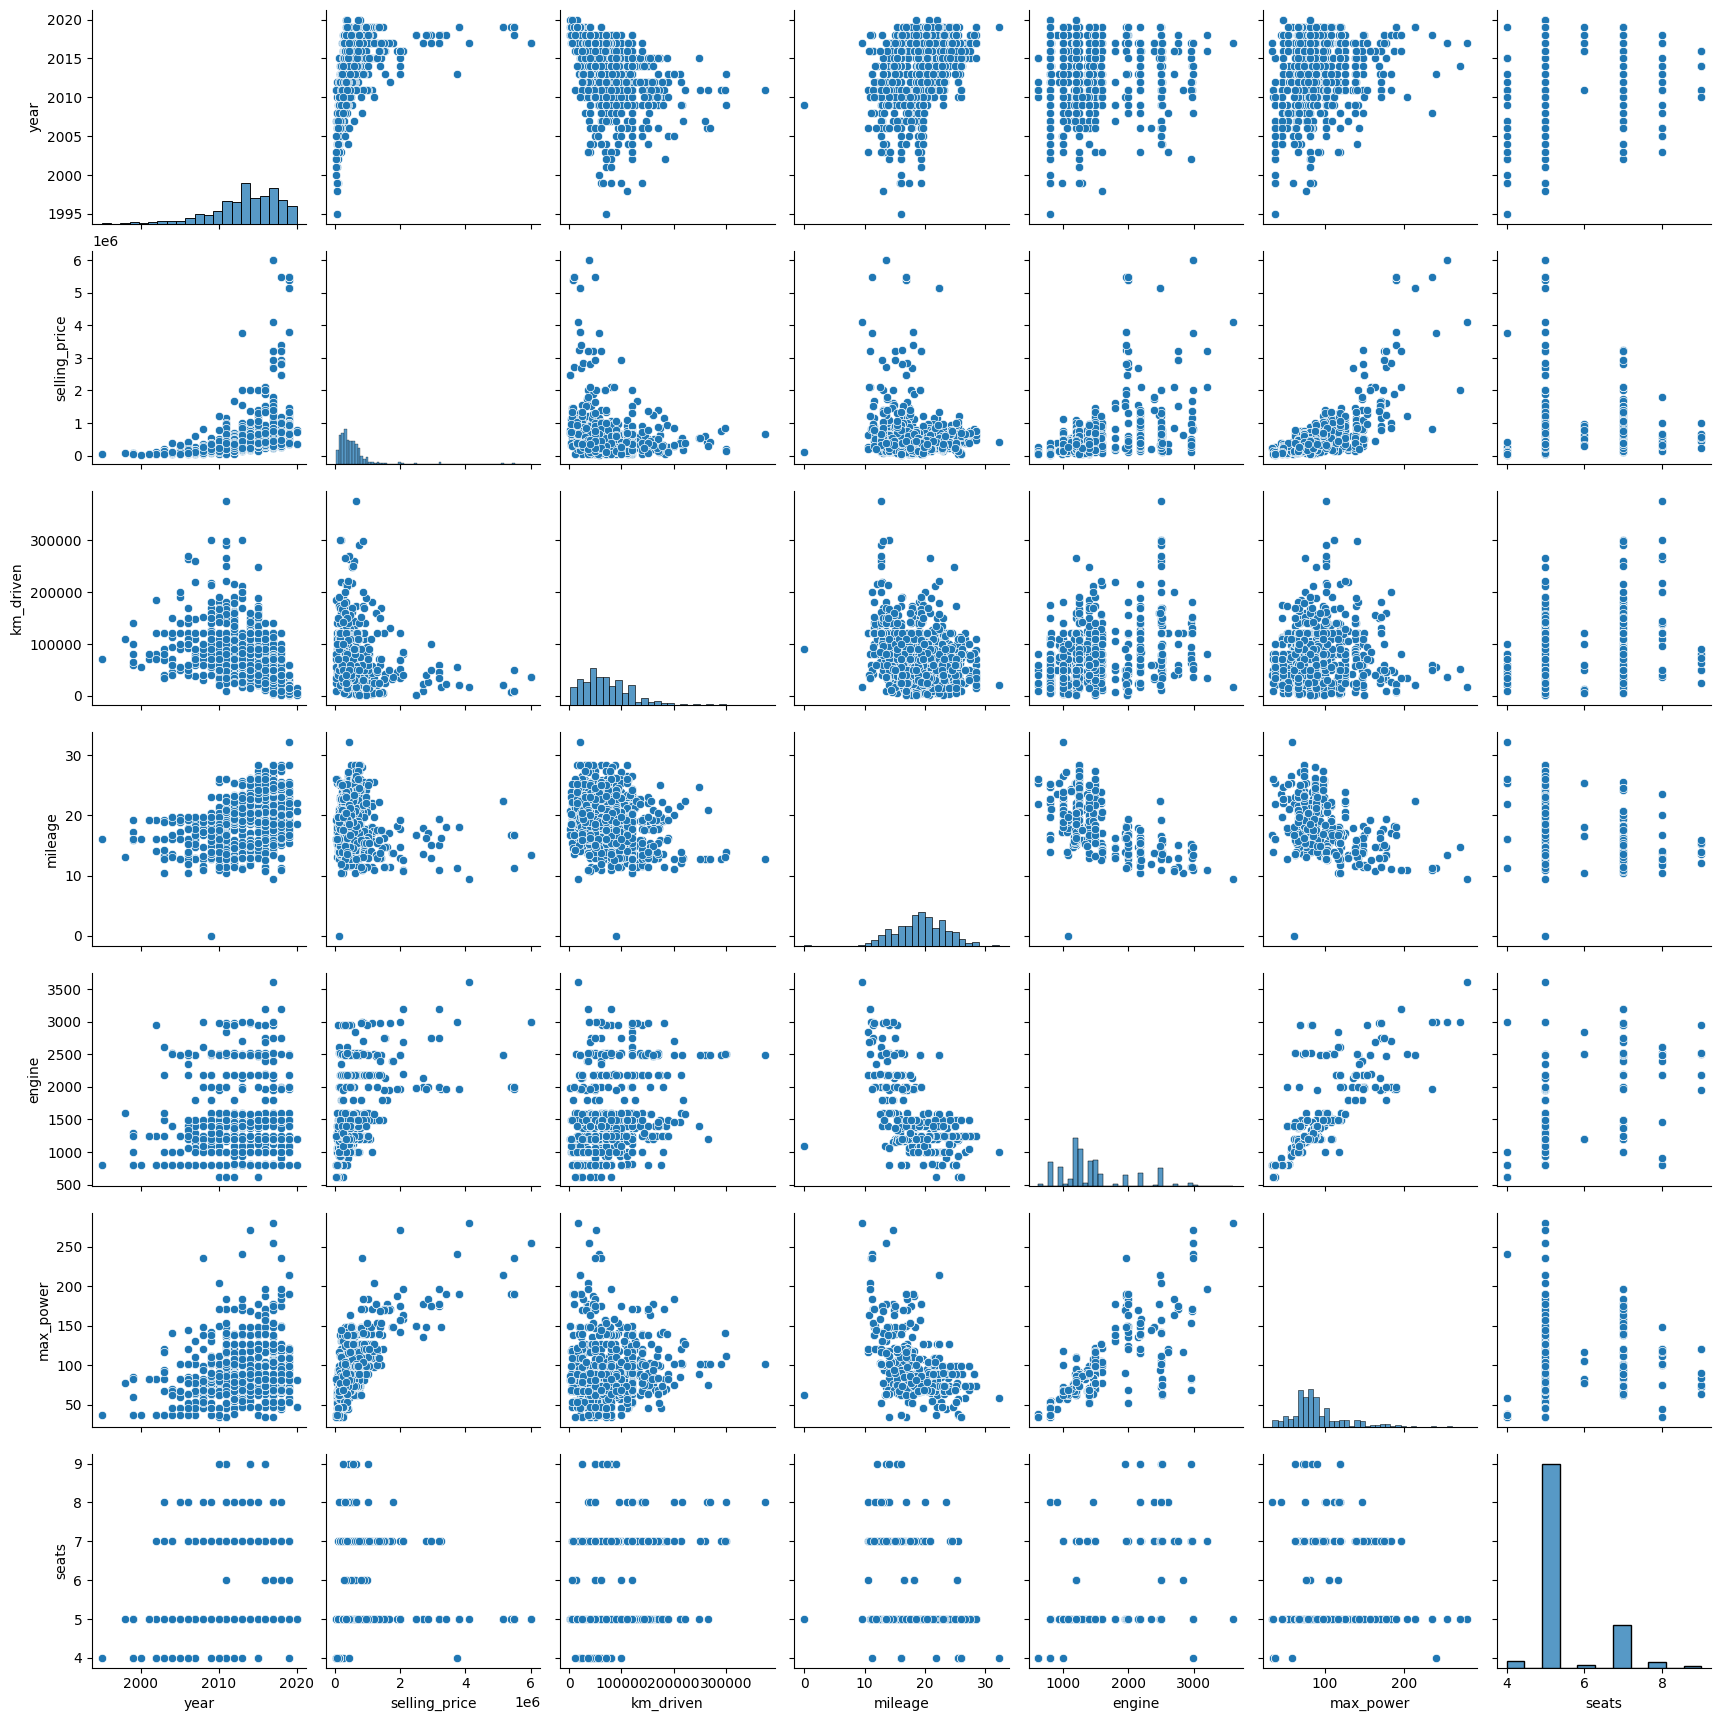

In [62]:
# your code here
sns.pairplot(df_test)

`Your answer here`
Похожими ли оказались совокупности при разделении на трейн и тест?
В большей степени сосвокупности похожи, но различия всё же, это было видно и на этапе изучения статистик по совокупностям. В тесте меньше разброс значений по многим признакам, поэтому распределния отдельных признаков чаще сильнее похожи на нормальные, и меньше объектов, которые сильно отличаются от других (точек на графиках, далеко отстоящих от основной массы)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

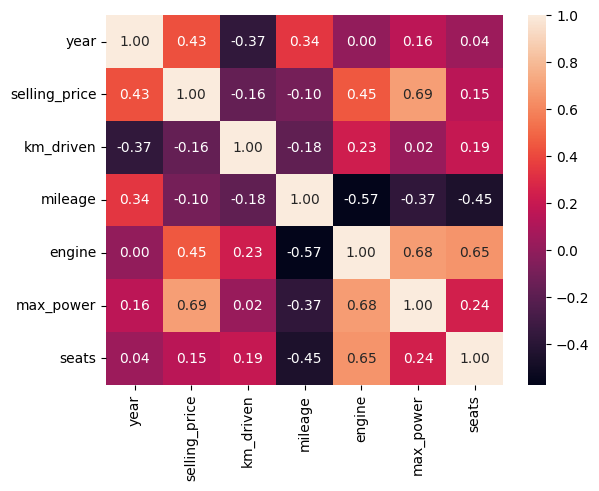

In [63]:
# your code here
sns.heatmap(df_train.drop(['name',	'fuel',	'seller_type',	'transmission',	'owner'], axis=1).corr(), annot=True, fmt='.2f')

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Какие 2 признака наименее скоррелированы между собой?`

Наименьшая по модулю корреляция между пробегом и мощностью двигателя, равна 0,02.

`Между какими наблюдается довольно сильная положительная линейная зависимость?`

Довольно сильная линейная зависимость между мощностью и ценой авто - 0,69, между мощностью и объемом двигателя - 0,68, между кол-вом мест и объемом двигателя - 0,65. Наибольшая отрицательная линейная взаимосвязь между объемом двигателя и пробегом на литр топлива - -0,57.

`Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?`

Корреляция между этими признаками равна -0,37, что не очень много. Т.е. именно линейная обратная взаимосвязь есть, но выражена не очень явно.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

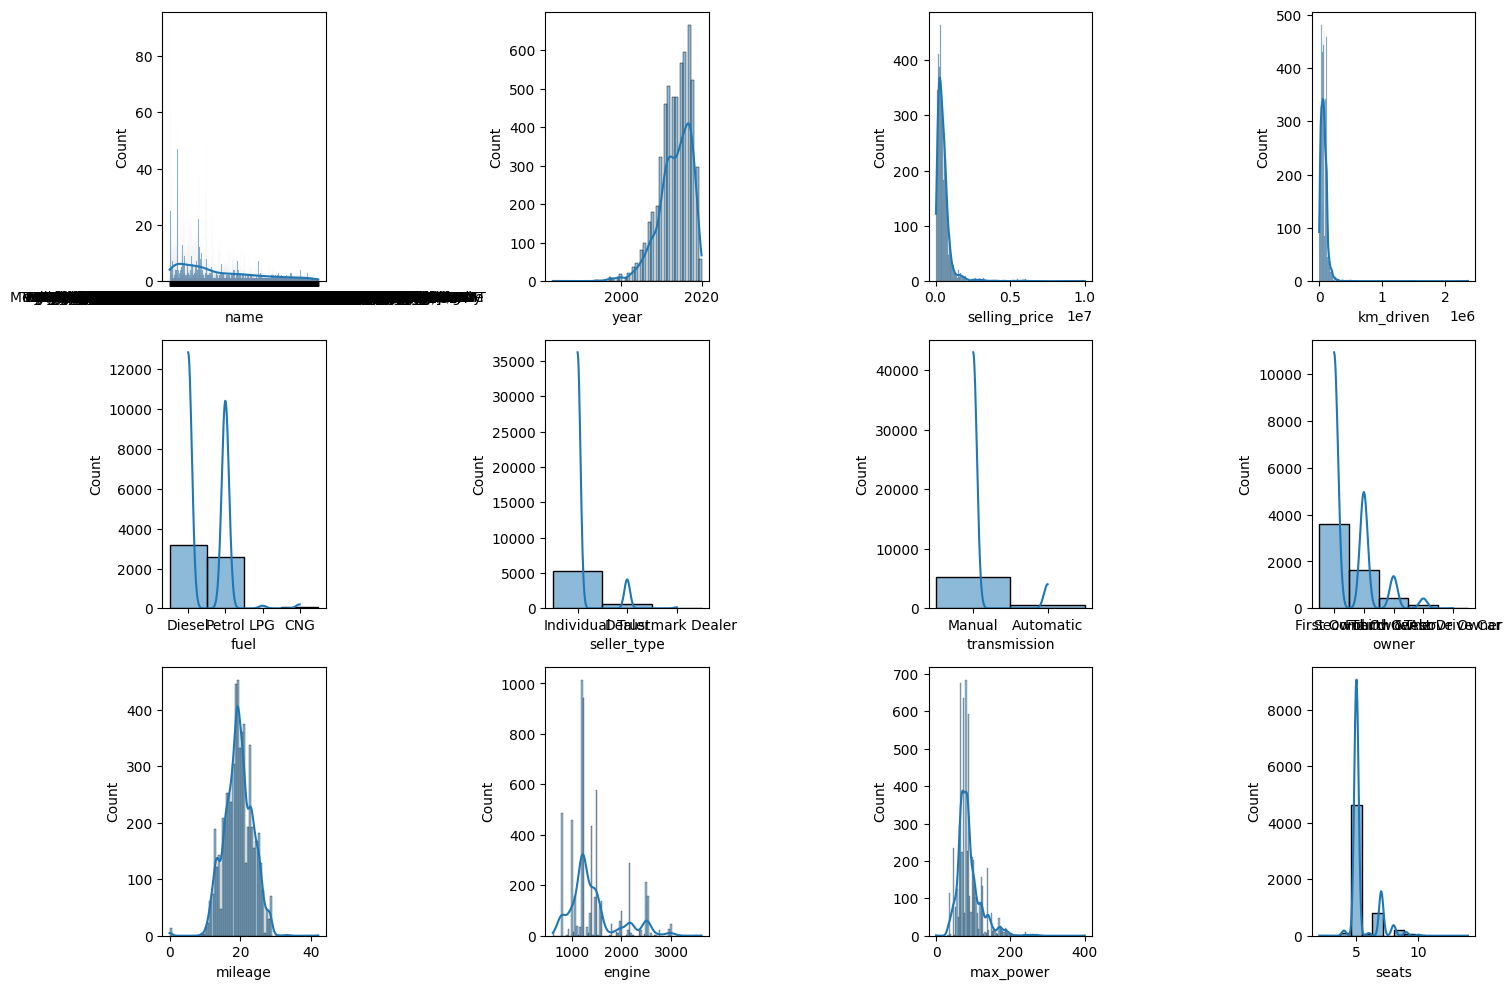

In [64]:
# your code here
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_train[column], kde=True)
plt.tight_layout()
plt.show()

Тут мы можем наглядно показать распределение всех признаков совокупности.

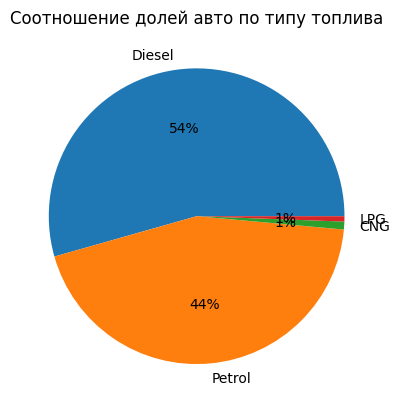

In [65]:
plt.pie(df_train['fuel'].value_counts().values, labels=df_train['fuel'].value_counts().index, autopct='%.0f%%')
plt.title('Соотношение долей авто по типу топлива')
plt.show()

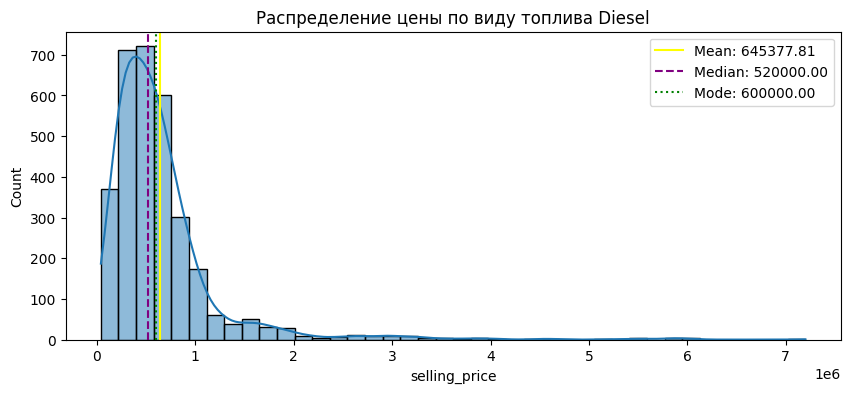

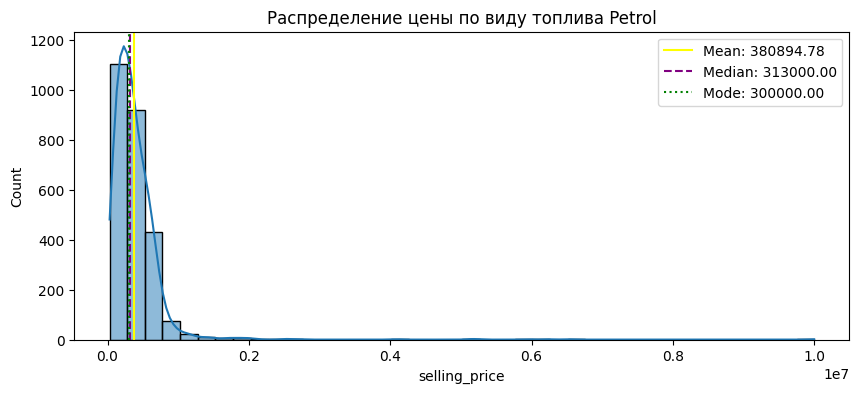

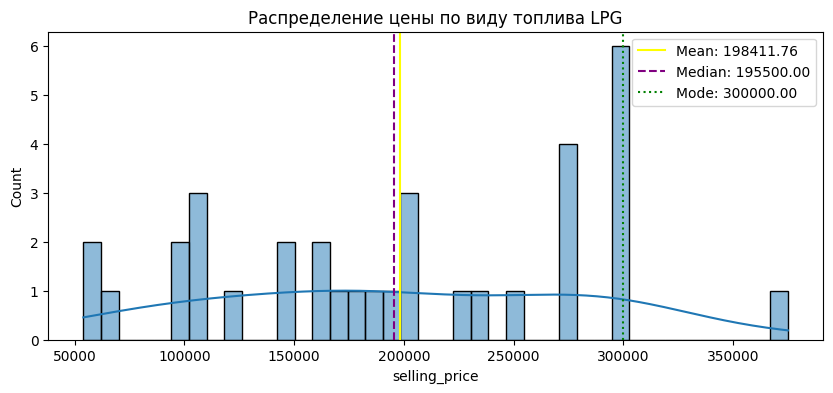

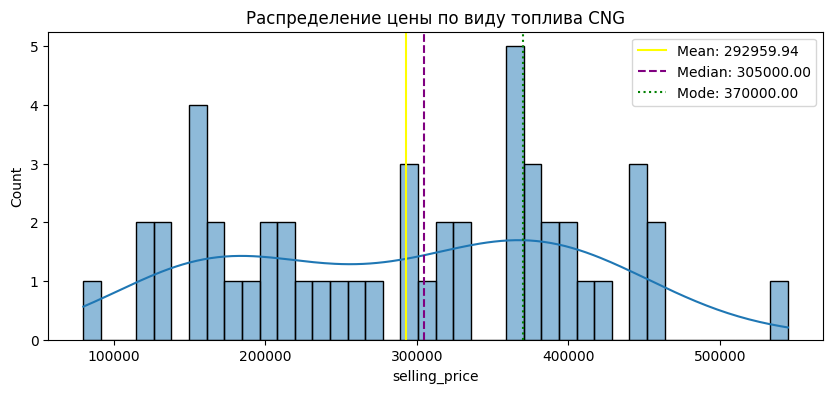

In [66]:
for i in ['Diesel', 'Petrol', 'LPG', 'CNG']:
   plt.figure(figsize=(10, 4))
   ds = df_train[df_train['fuel']==i]['selling_price']
   plt.title(f'Распределение цены по виду топлива {i}')
   ax = sns.histplot(ds, stat="count", kde = True, bins = 40)
   ax.plot()

   plt.axvline(x=ds.mean(), color='yellow', label=f'Mean: {ds.mean():.2f}')
   plt.axvline(x=ds.median(), color='purple', ls='--', label=f'Median: {ds.median():.2f}')
   plt.axvline(x=ds.mode()[0], color='green', ls=':', label=f'Mode: {ds.mode()[0]:.2f}')
   plt.legend()

## Выводы
Дизельные авто имеют более высокую цену, это отражается и в среднем, и в медианном значении. Среди бензиновых гораздо меньше различных значений, в том числе меньше объектов, сильно отличающихся от основной массы объектов. Для обеих категорий распределения смещены, имеют длинные хвосты справа. Оставшиеся две категории распределены более равномерно, но их количество статистически на уровне погрешности.

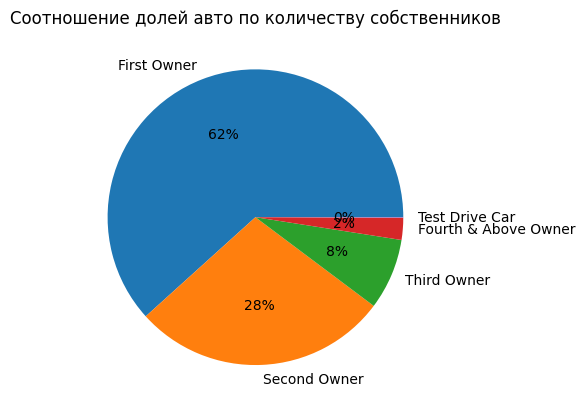

In [67]:
plt.pie(df_train['owner'].value_counts().values, labels=df_train['owner'].value_counts().index, autopct='%.0f%%')
plt.title('Соотношение долей авто по количеству собственников')
plt.show()

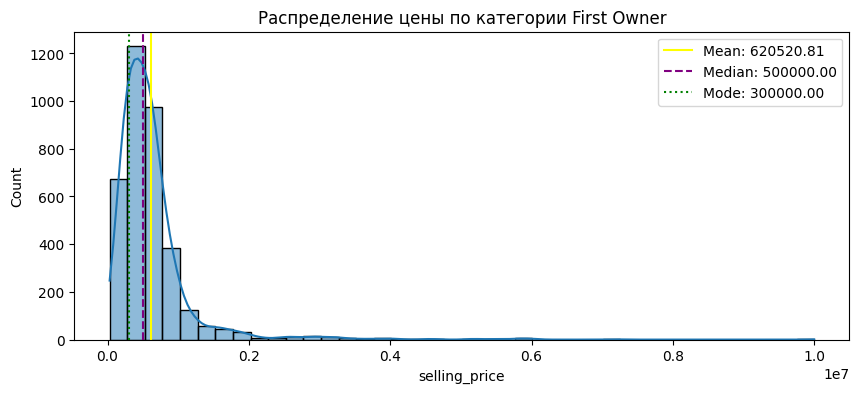

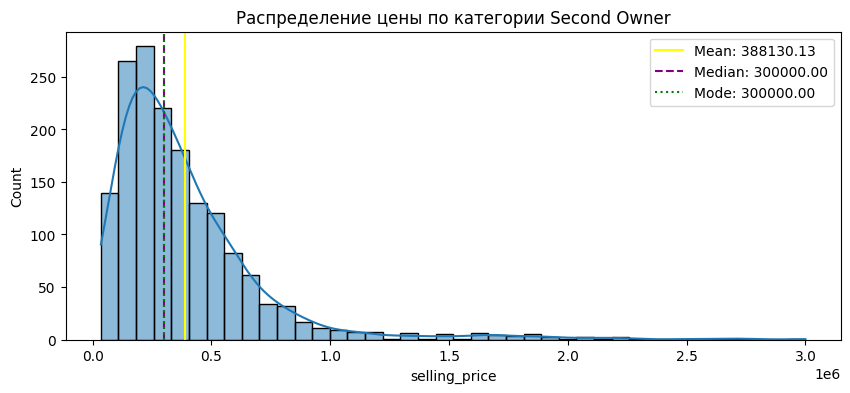

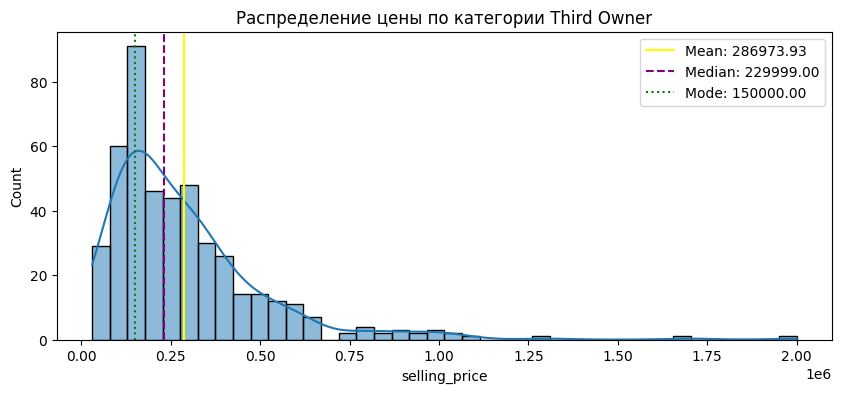

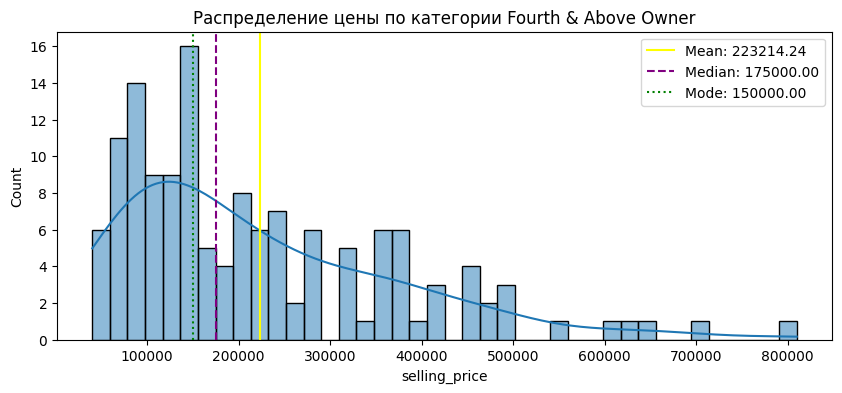

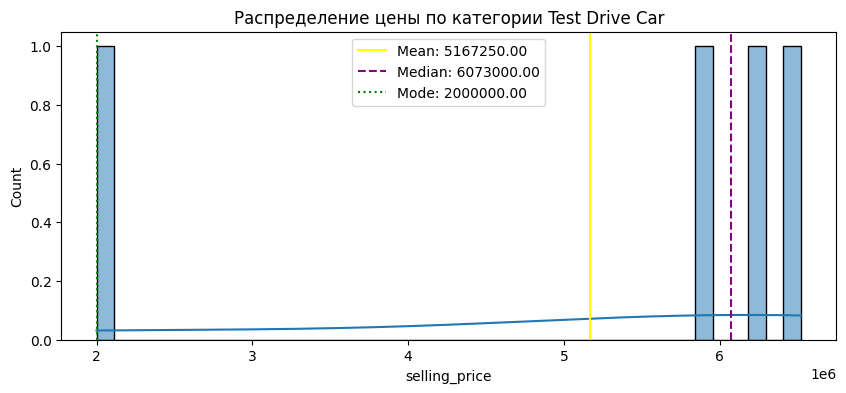

In [68]:
for i in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']:
   plt.figure(figsize=(10, 4))
   ds = df_train[df_train['owner']==i]['selling_price']

   ax = sns.histplot(ds, stat="count", kde = True, bins = 40)
   plt.title(f'Распределение цены по категории {i}')
   ax.plot()

   plt.axvline(x=ds.mean(), color='yellow', label=f'Mean: {ds.mean():.2f}')
   plt.axvline(x=ds.median(), color='purple', ls='--', label=f'Median: {ds.median():.2f}')
   plt.axvline(x=ds.mode()[0], color='green', ls=':', label=f'Mode: {ds.mode()[0]:.2f}')
   plt.legend()

## Выводы
По количеству собственников больше всего объектов с одним владельцем, и среди них цены гораздо более высокие. От авто с двумя владельцами среднее и медиана отличаются почти вдвое, хотя моды при этом одинаковые. Авто с тремя собственниками еще меньше, чем с двумя, и показатели цены еще ниже, чем у авто с двумя собственниками, только теперь и мода вдвое ниже. С 4 и более собственниками выборка очень мала для серьезных выводов, но небольшое снижение показателей также заметно.

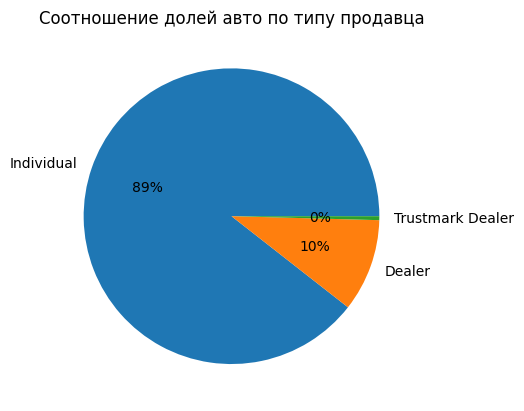

In [69]:
plt.pie(df_train['seller_type'].value_counts().values, labels=df_train['seller_type'].value_counts().index, autopct='%.0f%%')
plt.title('Соотношение долей авто по типу продавца')
plt.show()

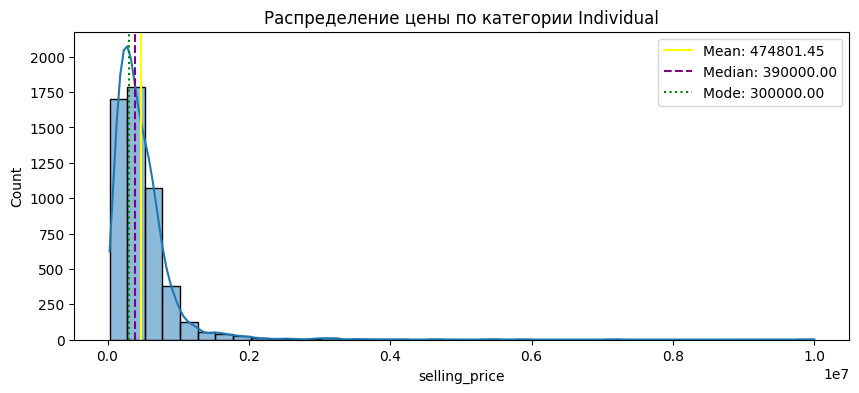

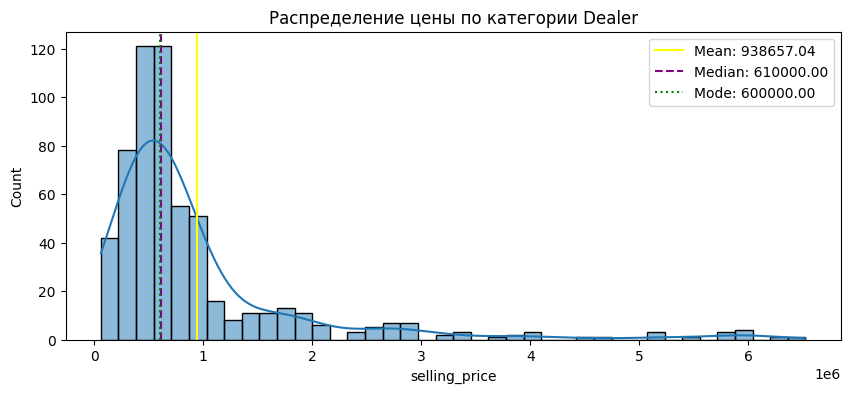

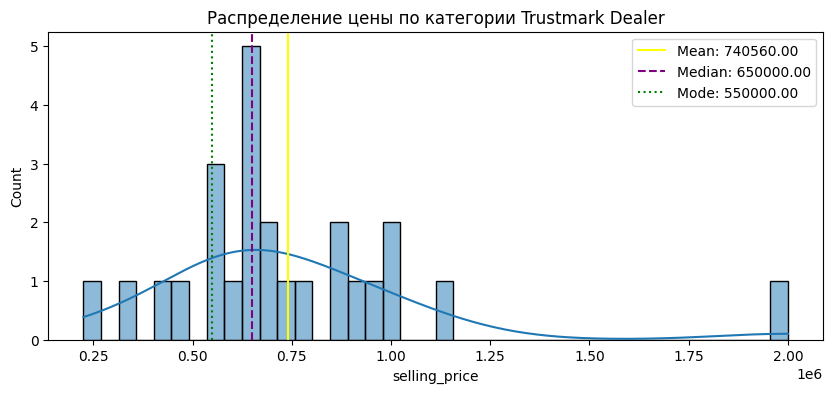

In [70]:
for i in ['Individual', 'Dealer', 'Trustmark Dealer']:
   plt.figure(figsize=(10, 4))
   ds = df_train[df_train['seller_type']==i]['selling_price']

   ax = sns.histplot(ds, stat="count", kde = True, bins = 40)
   plt.title(f'Распределение цены по категории {i}')
   ax.plot()

   plt.axvline(x=ds.mean(), color='yellow', label=f'Mean: {ds.mean():.2f}')
   plt.axvline(x=ds.median(), color='purple', ls='--', label=f'Median: {ds.median():.2f}')
   plt.axvline(x=ds.mode()[0], color='green', ls=':', label=f'Mode: {ds.mode()[0]:.2f}')
   plt.legend()

## Вывод
Авто у дилеров продается меньше по количеству, но гораздо дороже

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [20]:
y_train = df_train['selling_price']
X_train = df_train.drop(['selling_price', 'name', 'fuel', 'seller_type',
       'transmission', 'owner'], axis=1)

In [ ]:
assert X_train.shape == (5840, 6)

In [21]:
y_test = df_test['selling_price']
X_test = df_test.drop(['selling_price', 'name', 'fuel', 'seller_type',
       'transmission', 'owner'], axis=1)

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

num_model = LinearRegression()
num_model.fit(X_train, y_train)
num_pred_train = num_model.predict(X_train)
print('train R2:', r2_score(y_train, num_pred_train))
print('train MSE:', MSE(y_train, num_pred_train))

num_pred_test = num_model.predict(X_test)
print('test R2:', r2_score(y_test, num_pred_test))
print('test MSE:', MSE(y_test, num_pred_test))

train R2: 0.5922629595849869
train MSE: 116873067751.52179
test R2: 0.5941441219017086
test MSE: 233297548204.61337


## Вывод
модель показывает умеренные и почти одинаковые значения метрики r2 на трейне и на тесте, и довольно большие значения MSE на обоих сетах. Монжно сказать, что модель не переобучена, и недостаточно точно предсказывает значения.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [74]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))


scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
scaled_pred_train = scaled_model.predict(X_train_scaled)
print('train R2:', r2_score(y_train, scaled_pred_train))
print('train MSE:', MSE(y_train, scaled_pred_train))

scaled_pred_test = scaled_model.predict(X_test_scaled)
print('test R2:', r2_score(y_test, scaled_pred_test))
print('test MSE:', MSE(y_test, scaled_pred_test))

train R2: 0.5922629595849875
train MSE: 116873067751.52162
test R2: 0.5941441219017262
test MSE: 233297548204.6033


## Вывод
В данном случае стандартизация не изменила метрики на трейне и на уровне погрешности изменила метрики на тесте

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [75]:
# your code here
coefs = pd.DataFrame(scaled_model.coef_, X_train.columns)

In [76]:
coefs

0
year       152843.262358
km_driven  -44148.047511
mileage     28781.086595
engine      61176.857150
max_power  322779.703236
seats      -23220.570226

### Вывод
Модель придала наибольший вес признаку мощности авто

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [77]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
lasso_pred_train = lasso_model.predict(X_train_scaled)
lasso_pred_test = lasso_model.predict(X_test_scaled)

print('R2 train:', r2_score(y_train, lasso_pred_train))
print('MSE train:', MSE(y_train, lasso_pred_train))
print('R2 test', r2_score(y_test, lasso_pred_test))
print('MSE test', MSE(y_test, lasso_pred_test))

R2 train: 0.5922629595497046
MSE train: 116873067761.63504
R2 test 0.5941429546560312
MSE test 233298219170.76022


In [78]:
# your code here
lasso_coefs = pd.DataFrame(lasso_model.coef_, X_train.columns)
lasso_coefs

0
year       152843.083853
km_driven  -44146.918538
mileage     28779.204085
engine      61172.025780
max_power  322780.586197
seats      -23217.693273

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [108]:
from sklearn.model_selection import GridSearchCV

# your code here
params = {'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100.0]}
gsl = GridSearchCV(
    estimator=Lasso(),
    param_grid=params,
    cv=10
)
gsl.fit(X_train_scaled, y_train)
print('Лучший коэффициент:', gsl.best_params_['alpha'])
print('Лучший результат метрики R2:', gsl.best_score_)
print('Веса лучшей модели:', gsl.best_estimator_.coef_)

Лучший коэффициент: 100.0
Лучший результат метрики R2: 0.5682328004899914
Веса лучшей модели: [152819.5529717  -44037.83207098  28601.04061998  60701.69450513
 322866.99092623 -22933.37348536]


Перебрали 6 моделей на 10 фолдах, лучший коэффициент равен 100, но заметной разницы в качестве не наблюдается, никакие веса не занулились

In [109]:
gsl_pred = gsl.best_estimator_.predict(X_test_scaled)

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [110]:
from sklearn.linear_model import ElasticNet

# your code here
params = {'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100.0],
          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}
gse = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=params,
    cv=10
)
gse.fit(X_train_scaled, y_train)
print('Лучший коэффициент:', gse.best_params_)
print('Лучший результат метрики R2:', gse.best_score_)
print('Веса лучшей модели:', gse.best_estimator_.coef_)

Лучший коэффициент: {'alpha': 1, 'l1_ratio': 0.9}
Лучший результат метрики R2: 0.5761378555173832
Веса лучшей модели: [146041.11461375 -46021.21571588  22845.76274071  79237.72636177
 281536.65815575 -24516.39609253]


обучили 6*6=36 моделей с разными гиперпараметрами, лучшая модель получилась с альфа=1 и l1=0.9

In [111]:
gse_pred = gse.best_estimator_.predict(X_test_scaled)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [23]:
# your code here

df_train['name'] = df_train['name'].apply(lambda x: x.split()[0])
df_train.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
3   Maruti  2007         130000     120000  Petrol  Individual       Manual   
4  Hyundai  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40    1248      74.00      5  
1  Second Owner    21.14    1498     103.52      5  
2   First Owner    23.00    1396      90.00      5  
3   First Owner    16.10    1298      88.20      5  
4   First Owner    20.14    1197      81.86      5

In [24]:
df_test['name'] = df_test['name'].apply(lambda x: x.split()[0])

In [25]:
df_train['name'].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

Вероятно, марка авто отражается на его стоимости. К примеру, "средний" BMW стоит дороже "среднего" Skoda. Попробуем применить OHE, хотя и получим довольно много новых колонок

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(df_train['name'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore')

In [27]:
encoded_name = pd.DataFrame(encoder.transform(df_train['name'].values.reshape(-1, 1)).toarray(), columns=encoder.get_feature_names_out())

In [86]:
encoded_name.head()

x0_Audi  x0_BMW  x0_Chevrolet  x0_Daewoo  x0_Datsun  x0_Fiat  x0_Force  \
0      0.0     0.0           0.0        0.0        0.0      0.0       0.0   
1      0.0     0.0           0.0        0.0        0.0      0.0       0.0   
2      0.0     0.0           0.0        0.0        0.0      0.0       0.0   
3      0.0     0.0           0.0        0.0        0.0      0.0       0.0   
4      0.0     0.0           0.0        0.0        0.0      0.0       0.0   

   x0_Ford  x0_Honda  x0_Hyundai  ...  x0_Mercedes-Benz  x0_Mitsubishi  \
0      0.0       0.0         0.0  ...               0.0            0.0   
1      0.0       0.0         0.0  ...               0.0            0.0   
2      0.0       0.0         1.0  ...               0.0            0.0   
3      0.0       0.0         0.0  ...               0.0            0.0   
4      0.0       0.0         1.0  ...               0.0            0.0   

   x0_Nissan  x0_Peugeot  x0_Renault  x0_Skoda  x0_Tata  x0_Toyota  \
0        0.0         0.0         0.0       0.0      0.0        0.0   
1        0.0         0.0         0.0       1.0      0.0        0.0   
2        0.0         0.0         0.0       0.0      0.0        0.0   
3        0.0         0.0         0.0       0.0      0.0        0.0   
4        0.0         0.0         0.0       0.0      0.0        0.0   

   x0_Volkswagen  x0_Volvo  
0            0.0       0.0  
1            0.0       0.0  
2            0.0       0.0  
3            0.0       0.0  
4            0.0       0.0  

[5 rows x 29 columns]

In [28]:
df_train_enc = pd.concat([df_train.drop('name', axis=1), encoded_name], axis=1).reset_index(drop=True)
df_train_enc.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2010         225000     127000  Diesel  Individual       Manual   
3  2007         130000     120000  Petrol  Individual       Manual   
4  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  ...  x0_Mercedes-Benz  \
0   First Owner    23.40    1248      74.00  ...               0.0   
1  Second Owner    21.14    1498     103.52  ...               0.0   
2   First Owner    23.00    1396      90.00  ...               0.0   
3   First Owner    16.10    1298      88.20  ...               0.0   
4   First Owner    20.14    1197      81.86  ...               0.0   

   x0_Mitsubishi  x0_Nissan  x0_Peugeot  x0_Renault  x0_Skoda  x0_Tata  \
0            0.0        0.0         0.0         0.0       0.0      0.0   
1            0.0        0.0         0.0         0.0       1.0      0.0   
2            0.0        0.0         0.0         0.0       0.0      0.0   
3            0.0        0.0         0.0         0.0       0.0      0.0   
4            0.0        0.0         0.0         0.0       0.0      0.0   

   x0_Toyota  x0_Volkswagen  x0_Volvo  
0        0.0            0.0       0.0  
1        0.0            0.0       0.0  
2        0.0            0.0       0.0  
3        0.0            0.0       0.0  
4        0.0            0.0       0.0  

[5 rows x 40 columns]

In [29]:
encoded_name_test = pd.DataFrame(encoder.transform(df_test['name'].values.reshape(-1, 1)).toarray(), columns=encoder.get_feature_names_out())

c:\Users\dmitr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
df_test_enc = pd.concat([df_test.drop('name', axis=1), encoded_name_test], axis=1).reset_index(drop=True)
df_test_enc.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2010         229999     168000  Diesel  Individual       Manual   
1  2017         665000      25000  Diesel  Individual       Manual   
2  2007         175000     218463  Petrol  Individual    Automatic   
3  2015         635000     173000  Diesel  Individual       Manual   
4  2011         130000      70000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  ...  x0_Mercedes-Benz  \
0   First Owner     14.0    2498      112.0  ...               0.0   
1   First Owner     21.5    1497      108.5  ...               0.0   
2   First Owner     12.9    1799      130.0  ...               0.0   
3   First Owner     25.1    1498       98.6  ...               0.0   
4  Second Owner     16.5    1172       65.0  ...               0.0   

   x0_Mitsubishi  x0_Nissan  x0_Peugeot  x0_Renault  x0_Skoda  x0_Tata  \
0            0.0        0.0         0.0         0.0       0.0      0.0   
1            0.0        0.0         0.0         0.0       0.0      1.0   
2            0.0        0.0         0.0         0.0       0.0      0.0   
3            0.0        0.0         0.0         0.0       0.0      0.0   
4            0.0        0.0         0.0         0.0       0.0      1.0   

   x0_Toyota  x0_Volkswagen  x0_Volvo  
0        0.0            0.0       0.0  
1        0.0            0.0       0.0  
2        0.0            0.0       0.0  
3        0.0            0.0       0.0  
4        0.0            0.0       0.0  

[5 rows x 40 columns]

In [90]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [91]:
X_train_cat.describe(include='object')

NameError: name 'X_train_cat' is not defined

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [31]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(df_train[['fuel', 'seller_type', 'transmission', 'owner']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [32]:
encoded_cat = pd.DataFrame(encoder.transform(df_train[['fuel', 'seller_type', 'transmission', 'owner']]).toarray(), columns=encoder.get_feature_names_out())
encoded_cat.head()

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          1.0       0.0          0.0                     1.0   
1          1.0       0.0          0.0                     1.0   
2          1.0       0.0          0.0                     1.0   
3          0.0       0.0          1.0                     1.0   
4          0.0       0.0          1.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                           0.0                  1.0   
1                           0.0                  1.0   
2                           0.0                  1.0   
3                           0.0                  1.0   
4                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 1.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 0.0                   0.0   

   owner_Third Owner  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [33]:
df_train_enc = pd.concat([df_train_enc.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1), encoded_cat], axis=1).reset_index(drop=True)
df_train_enc.head()

year  selling_price  km_driven  mileage  engine  max_power  seats  x0_Audi  \
0  2014         450000     145500    23.40    1248      74.00      5      0.0   
1  2014         370000     120000    21.14    1498     103.52      5      0.0   
2  2010         225000     127000    23.00    1396      90.00      5      0.0   
3  2007         130000     120000    16.10    1298      88.20      5      0.0   
4  2017         440000      45000    20.14    1197      81.86      5      0.0   

   x0_BMW  x0_Chevrolet  ...  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0     0.0           0.0  ...          1.0       0.0          0.0   
1     0.0           0.0  ...          1.0       0.0          0.0   
2     0.0           0.0  ...          1.0       0.0          0.0   
3     0.0           0.0  ...          0.0       0.0          1.0   
4     0.0           0.0  ...          0.0       0.0          1.0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                     1.0                           0.0                  1.0   
1                     1.0                           0.0                  1.0   
2                     1.0                           0.0                  1.0   
3                     1.0                           0.0                  1.0   
4                     1.0                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 1.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 0.0                   0.0   

   owner_Third Owner  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 46 columns]

In [34]:
encoded_cat_test = pd.DataFrame(encoder.transform(df_test[['fuel', 'seller_type', 'transmission', 'owner']]).toarray(), columns=encoder.get_feature_names_out())
df_test_enc = pd.concat([df_test_enc.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1), encoded_cat_test], axis=1).reset_index(drop=True)
df_test_enc.head()

year  selling_price  km_driven  mileage  engine  max_power  seats  x0_Audi  \
0  2010         229999     168000     14.0    2498      112.0      7      0.0   
1  2017         665000      25000     21.5    1497      108.5      5      0.0   
2  2007         175000     218463     12.9    1799      130.0      5      0.0   
3  2015         635000     173000     25.1    1498       98.6      5      0.0   
4  2011         130000      70000     16.5    1172       65.0      5      0.0   

   x0_BMW  x0_Chevrolet  ...  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0     0.0           0.0  ...          1.0       0.0          0.0   
1     0.0           0.0  ...          1.0       0.0          0.0   
2     0.0           0.0  ...          0.0       0.0          1.0   
3     0.0           0.0  ...          1.0       0.0          0.0   
4     0.0           0.0  ...          0.0       0.0          1.0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                     1.0                           0.0                  1.0   
1                     1.0                           0.0                  1.0   
2                     1.0                           0.0                  0.0   
3                     1.0                           0.0                  1.0   
4                     1.0                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 0.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 1.0                   0.0   

   owner_Third Owner  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 46 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [35]:
from sklearn.preprocessing import MinMaxScaler

X_train_enc = df_train_enc.drop('selling_price', axis=1)
scaler = MinMaxScaler()
scaler.fit(X_train_enc)
X_train_enc_s = pd.DataFrame(scaler.transform(X_train_enc), columns=X_train_enc.columns)
X_train_enc_s.head()

year  km_driven   mileage    engine  max_power  seats  x0_Audi  x0_BMW  \
0  0.837838   0.061640  0.557143  0.209396    0.18500   0.25      0.0     0.0   
1  0.837838   0.050837  0.503333  0.293289    0.25880   0.25      0.0     0.0   
2  0.729730   0.053803  0.547619  0.259060    0.22500   0.25      0.0     0.0   
3  0.648649   0.050837  0.383333  0.226174    0.22050   0.25      0.0     0.0   
4  0.918919   0.019064  0.479524  0.192282    0.20465   0.25      0.0     0.0   

   x0_Chevrolet  x0_Daewoo  ...  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0           0.0        0.0  ...          1.0       0.0          0.0   
1           0.0        0.0  ...          1.0       0.0          0.0   
2           0.0        0.0  ...          1.0       0.0          0.0   
3           0.0        0.0  ...          0.0       0.0          1.0   
4           0.0        0.0  ...          0.0       0.0          1.0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                     1.0                           0.0                  1.0   
1                     1.0                           0.0                  1.0   
2                     1.0                           0.0                  1.0   
3                     1.0                           0.0                  1.0   
4                     1.0                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 1.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 0.0                   0.0   

   owner_Third Owner  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 45 columns]

In [36]:
X_test_enc = df_test_enc.drop('selling_price', axis=1)

X_test_enc_s = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns)
X_test_enc_s.head()

year  km_driven   mileage    engine  max_power     seats  x0_Audi  \
0  0.729730   0.071172  0.333333  0.628859    0.28000  0.416667      0.0   
1  0.918919   0.010591  0.511905  0.292953    0.27125  0.250000      0.0   
2  0.648649   0.092551  0.307143  0.394295    0.32500  0.250000      0.0   
3  0.864865   0.073290  0.597619  0.293289    0.24650  0.250000      0.0   
4  0.756757   0.029655  0.392857  0.183893    0.16250  0.250000      0.0   

   x0_BMW  x0_Chevrolet  x0_Daewoo  ...  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0     0.0           0.0        0.0  ...          1.0       0.0          0.0   
1     0.0           0.0        0.0  ...          1.0       0.0          0.0   
2     0.0           0.0        0.0  ...          0.0       0.0          1.0   
3     0.0           0.0        0.0  ...          1.0       0.0          0.0   
4     0.0           0.0        0.0  ...          0.0       0.0          1.0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                     1.0                           0.0                  1.0   
1                     1.0                           0.0                  1.0   
2                     1.0                           0.0                  0.0   
3                     1.0                           0.0                  1.0   
4                     1.0                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 0.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 1.0                   0.0   

   owner_Third Owner  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 45 columns]

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
y_train_s = df_train_enc['selling_price']
y_test_s = df_test_enc['selling_price']

params = {'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100.0]}
gsr = GridSearchCV(
    estimator=Ridge(),
    param_grid=params,
    cv=10,
    scoring='r2'
)
gsr.fit(X_train_enc_s, y_train_s)
print('Лучший коэффициент:', gsr.best_params_)
print('Лучший результат метрики R2:', gsr.best_score_)
print('Веса лучшей модели:', gsr.best_estimator_.coef_)

Лучший коэффициент: {'alpha': 1}
Лучший результат метрики R2: 0.7014571684005414
Веса лучшей модели: [ 1409153.91225663 -1003670.64290517    50954.01645656   260983.39689859
  2309813.77094175    20998.67765547   420275.4277792   1054274.51885302
  -517711.52312346   -25968.9414832   -531593.43202697  -498840.81573216
  -351189.7133515   -457384.66127614  -457706.18559902  -427744.9757583
    44019.25185488   651869.93589495   133914.23678367   -52714.47278851
   869655.77000621  1521265.0884705    139223.66222033  -438991.48749622
  -360194.92971269   591603.82562671  -153632.89440435  -460654.6019135
   -73662.16200946  -463647.8731985   -470006.08224675  -537441.39601659
  -189332.68567546  -500787.21650878  1715641.61109903   113905.28155758
   126589.29468965    38731.25648179   -68057.22079134   -47880.74328517
  -105066.96711481   -52245.87312341   -63864.5095744   2520671.70071171
   -51345.53634963]


In [99]:
coefficients = gsr.best_estimator_.coef_
feature_names = X_train_enc_s.columns
feature_importance = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients})

print("Все Признаки")
print(feature_importance.sort_values(by='Коэффициент'))

Все Признаки
                         Признак   Коэффициент
1                      km_driven -1.003671e+06
31                       x0_Tata -5.374414e+05
10                     x0_Datsun -5.315934e+05
8                   x0_Chevrolet -5.177115e+05
33                 x0_Volkswagen -5.007872e+05
11                       x0_Fiat -4.988408e+05
30                      x0_Skoda -4.700061e+05
29                    x0_Renault -4.636479e+05
27                     x0_Nissan -4.606546e+05
14                      x0_Honda -4.577062e+05
13                       x0_Ford -4.573847e+05
23                   x0_Mahindra -4.389915e+05
15                    x0_Hyundai -4.277450e+05
24                     x0_Maruti -3.601949e+05
12                      x0_Force -3.511897e+05
32                     x0_Toyota -1.893327e+05
26                 x0_Mitsubishi -1.536329e+05
40           transmission_Manual -1.050670e+05
28                    x0_Peugeot -7.366216e+04
38        seller_type_Individual -6.805722e+04


На тренировочных данных получили значительный прирост по метрике r2

In [38]:
best_pred = gsr.best_estimator_.predict(X_test_enc_s)
print(r2_score(y_test_s, best_pred))
print(MSE(y_test_s, best_pred))

0.7760900130947699
128709854365.75642


На тестовых данных r2 получили также значительно выше, при этом уменьшилось значение MSE, значит модель стала точнее

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [114]:
def business_metric(y_true, y_pred):
    # your code here
    diff = np.abs(y_true - y_pred)/y_true
    return len([i for i in diff if i <= 0.1])/len(y_true)*100


print('Бизнес-метрика модели на числовых признаках:', business_metric(y_test, num_pred_test))
print('Бизнес-метрика модели на числовых скалированных признаках:', business_metric(y_test, scaled_pred_test))
print('Бизнес-метрика модели с регуляризацией:', business_metric(y_test, lasso_pred_test))
print('Бизнес-метрика модели с регуляризацией и подбором параметров:', business_metric(y_test, gsl_pred))
print('Бизнес-метрика модели ElasticNet:', business_metric(y_test, gse_pred))
print('Бизнес-метрика модели с категориальными признаками:', business_metric(y_test_s, best_pred))


Бизнес-метрика модели на числовых признаках: 22.7
Бизнес-метрика модели на числовых скалированных признаках: 22.7
Бизнес-метрика модели с регуляризацией: 22.7
Бизнес-метрика модели с регуляризацией и подбором параметров: 22.7
Бизнес-метрика модели ElasticNet: 24.099999999999998
Бизнес-метрика модели с категориальными признаками: 29.5


`Your answer here`

Все модели справляются плохо, но лучшая среди худших - модель с категориальными признаками

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)


In [ ]:
import pickle
import os

# Сохранение модели
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, 'Ridge_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(gsr.best_estimator_, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Модель сохранена: {model_path}")

# Загрузка модели
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Использование
prediction = loaded_model.predict(X_test_enc)

✅ Модель сохранена: models\Ridge_model.pkl
